In [4]:
import tarfile
tar= tarfile.open("mfcc_64_train.tar.gz")
tar.extractall()

In [1]:
import numpy as np
import os
from os import listdir
import array

sequence_len = 1000

## english

eng = np.load('train/english/speaker-01-file-00.npy')
eng = np.transpose(eng)

for filename in listdir('train/english'):
    if (filename != 'speaker-01-file-00.npy'):
        
        en = np.load('train/english/'+ filename)
        np.vstack((eng,np.transpose(en)))
        
eng.shape

(79076, 64)

In [2]:
sequence_len = 1000
num_eng = len(eng) // sequence_len 
 
english = eng[:(num_eng*sequence_len)]
print(english.shape)

(79000, 64)


In [3]:
y_eng = [1,0,0]
y_english = np.tile(y_eng,(num_eng,sequence_len,1))

print(y_english.shape)

(79, 1000, 3)


In [4]:
## hindi

hin = np.load('train/hindi/speaker-01-file-00.npy')
hin = np.transpose(hin)

for filename in listdir('train/hindi'):
    if filename != 'speaker-01-file-00.npy':
        
        en = np.load('train/hindi/'+ filename)
        np.vstack((hin,np.transpose(en)))
        
print('hin shape :',hin.shape)

hin shape : (67010, 64)


In [5]:
num_hin = len(hin) // sequence_len 
 
hindi = hin[:(num_hin*sequence_len)]
print(hindi.shape)

(67000, 64)


In [6]:
y_hin = [0,1,0]
y_hindi = np.tile(y_hin,(num_hin,sequence_len,1))

print(y_hindi.shape)

(67, 1000, 3)


In [7]:
## mandarin

man = np.load('train/mandarin/speaker-02-file-00.npy')
man = np.transpose(man)

for filename in listdir('train/mandarin'):
    if filename != 'speaker-01-file-00.npy':
        
        en = np.load('train/mandarin/'+ filename)
        np.vstack((man,np.transpose(en)))
        
man.shape

(60182, 64)

In [8]:
num_man = len(man) // sequence_len 
 
mandarin = man[:(num_man*sequence_len)]
print(mandarin.shape)

(60000, 64)


In [9]:
y_man = [0,0,1]
y_mandarin = np.tile(y_man,(num_man,sequence_len,1))

print(y_mandarin.shape)

(60, 1000, 3)


In [10]:
N_seq = num_eng + num_hin + num_man

x = np.vstack((english,hindi,mandarin))
 
x = np.reshape(x, (N_seq, sequence_len, 64) )

y = np.vstack((y_english,y_hindi,y_mandarin))



In [11]:
print(x.shape)
print(y.shape)


(206, 1000, 64)
(206, 1000, 3)


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2)

In [13]:
import matplotlib.pyplot as plt
import tensorflow as tf
import os

import keras
from keras.models import Model
from keras.layers import GRU
from keras.layers import Input
from keras.layers import Dense
# from keras import metrics
from keras import losses


BATCH_SIZE = 32
EPOCHS = 50

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [14]:
print('\nBuilding model...')

DROPOUT = 0.0
RECURRENT_DROP_OUT = 0.0 

GRU_nodes = 4
main_input      = Input(shape=(None, 64), name='main_input')
pred_gru        = GRU( GRU_nodes, return_sequences=True, dropout=DROPOUT, recurrent_dropout=RECURRENT_DROP_OUT, name='pred_gru')(main_input)
rnn_output      = Dense(3, activation = 'sigmoid', name='rnn_output')(pred_gru)

model = Model(inputs=main_input, outputs=rnn_output)
print('\nCompiling model...')
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
model.summary()


Building model...

Compiling model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
main_input (InputLayer)      (None, None, 64)          0         
_________________________________________________________________
pred_gru (GRU)               (None, None, 4)           828       
_________________________________________________________________
rnn_output (Dense)           (None, None, 3)           15        
Total params: 843
Trainable params: 843
Non-trainable params: 0
_________________________________________________________________



Training...
Train on 206 samples, validate on 42 samples
Epoch 1/50
206/206 [==============================] - 7s 36ms/step - loss: 1.1957 - acc: 0.2040 - val_loss: 1.1817 - val_acc: 0.2179
Epoch 2/50
206/206 [==============================] - 6s 30ms/step - loss: 1.1742 - acc: 0.2304 - val_loss: 1.1676 - val_acc: 0.2183
Epoch 3/50
206/206 [==============================] - 6s 30ms/step - loss: 1.1513 - acc: 0.2477 - val_loss: 1.1477 - val_acc: 0.2515
Epoch 4/50
206/206 [==============================] - 6s 30ms/step - loss: 1.1246 - acc: 0.3016 - val_loss: 1.1039 - val_acc: 0.3748
Epoch 5/50
206/206 [==============================] - 7s 34ms/step - loss: 1.0870 - acc: 0.4314 - val_loss: 1.0783 - val_acc: 0.4353
Epoch 6/50
206/206 [==============================] - 6s 30ms/step - loss: 1.0594 - acc: 0.4903 - val_loss: 1.0532 - val_acc: 0.5128
Epoch 7/50
206/206 [==============================] - 7s 32ms/step - loss: 1.0379 - acc: 0.5434 - val_loss: 1.0436 - val_acc: 0.5131
Epoch 8/50


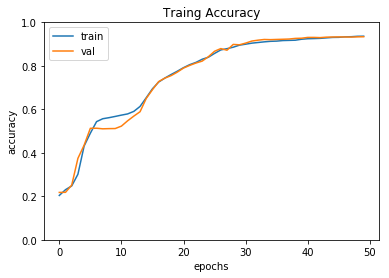

In [15]:
print('\nTraining...')
history = model.fit(x, y, batch_size=BATCH_SIZE, epochs=EPOCHS, shuffle=1,validation_data = (X_val,y_val))
model.save('hw_5_model.hdf5')

fig = plt.figure()
plt.plot( history.history['acc'], label = 'train')
plt.plot( history.history['val_acc'], label = 'val')
plt.title('Traing Accuracy')
axes = plt.gca()
axes.set_ylim([0, 1])   
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend()

